## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [112]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  
a. Read in the dataset and take a look at the top few rows here:

In [113]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [115]:
df.user_id.nunique()

290584

In [116]:
df.user_id.count()

294478

d. The proportion of users converted.

In [117]:
ctr = df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique()
ctr

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [118]:
len(df[df['group'] == 'treatment'][df['landing_page'] == 'old_page']) + len(df[df['group'] == 'control'][df['landing_page'] == 'new_page'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3893

f. Do any of the rows have missing values?

In [119]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**The rows do not have any missing values** 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [120]:
df_new_page = df[df['group'] == 'treatment'][df['landing_page'] == 'new_page']
df_old_page = df[df['group'] == 'control'][df['landing_page'] == 'old_page']
df2 = pd.concat([df_new_page, df_old_page])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [121]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below.

a. How many unique **user_id**s are in **df2**?

In [122]:
df2.user_id.nunique()

290584

**There are 290584 unique user ids.**

b. There is one **user_id** repeated in **df2**.  What is it?

In [123]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The repeated user id is 773192.**

c. What is the row information for the repeat **user_id**? 

In [124]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The information for the duplicated user id is on row 2893.**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [125]:
df2 = df2.drop(2893, axis = 0)

In [126]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below.

a. What is the probability of an individual converting regardless of the page they receive?

In [127]:
df2['converted'].mean()

0.11959708724499628

**The probability of an individual converting regardless of the page they receive is 11.95%.**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [128]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

**The probability of an individual in control group converting is 12.03%.**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [129]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

**The probability of an individual in treatment group converting is 11.88%.**

d. What is the probability that an individual received the new page?

In [130]:
df2[(df2['landing_page'] == 'new_page') == True].shape[0] / len(df2)

0.5000619442226688

**The probability that an individual received the new page is 50%.**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**It seems that the conversion rates in both cases are close 12% (control group - old page) and 11.88% (treatment group - new page. A further analysis of the data is necessary to conclude whether to enforce or drop the new page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: $p_{old}$ >= $p_{new}$**

 **H1: $p_{old}$ < $p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [131]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**The conversion rate for Pnew under the null is 11.95%.**

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [132]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**The conversion rate for Pold under the null is 11.95%.**

c. What is $n_{new}$, the number of individuals in the treatment group?

In [133]:
n_new = len(df2[df2['group'] == 'treatment'])
n_new

145310

**The Nnew, number of individuals in the treatment group is 145310.**

d. What is $n_{old}$, the number of individuals in the control group?

In [134]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

**The Nold, number of individuals in the control group is 145274.**

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [135]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.12003303282637121

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [136]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11919545135399315

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [137]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.00083758147237805725

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [138]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted = np.random.binomial(1, p_old, n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

In [139]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

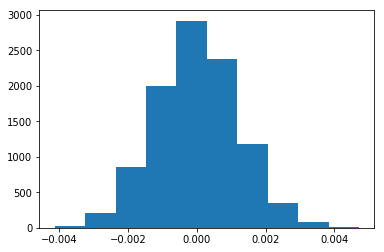

In [140]:
plt.hist(p_diffs);

**Yes, the plot looks like a normal distribution just as expected under the Central Limit Theorem.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [141]:
actual_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
actual_diff

-0.0015782389853555567

In [142]:
p_val = (p_diffs > actual_diff).mean()
p_val

0.90510000000000002

**The proportion on the p_diffs greater then the actual difference observed is 0.9055.**

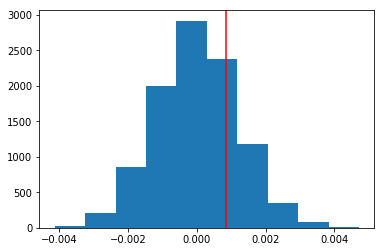

In [143]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff,color ='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The computed p-value in j, which is the probability that we will observe this statistic, given the null hypothesis is true. In this case the p-value is high (p-value > 0.05), suggesting that our statistic came from the distribution above and that we fail to reject the null hypothesis. We have not enough evidence that a page is better than the other, so at this moment and further investigation is needed.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [144]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [145]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is close to the mean and the p-value affirms the statistical significance of the results. Further they suggest that statistically the conversion rates for the old and new pages have no significant difference, the new page is not better, but similar to the old page. Therefore, the z-score and p-value computed support the decision of not dropping the null.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we are comparing conversion to no conversion, which is predicting two outcomes with a probability between 0 and 1. It seems that logistic regression is the best option.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [146]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [147]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [148]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [149]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-24 12:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

**In this case, the p-value associated with ab_page is 0.190.
In the linear regression, we test only if the parameter is or is not equal, predict the log odds. Our hypothesis set was:**

**H0: $p_{old}$ = $p_{new}$**

**H1: $p_{old}$ != $p_{new}$**

**In the hypothesis testing in part II we approached a different hypothesis:**

**H0: $p_{old}$ >= $p_{new}$**

**H1: $p_{old}$ < $p_{new}$**

**Where the intention was to predict the response, see which of the pages would convert more users.**
**Hence the difference.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Since it appears that conversion may not be so much influenced by the old or new page. It would be important to analyze different variables to understand what really drives the user to convert. So, it may be a good idea to consider adding other factors into the regression model.**

**It is important to choose factors that really cause an impact and skip those that do not. We also need to be aware not to choose variables that are correlated or to include wrong independent variables, as we may end up with unreliable results.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [150]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [151]:
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [152]:
new_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [153]:
new_df[['CA', 'UK', 'US']] = pd.get_dummies(new_df['country'])
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [154]:
logit_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-24 12:37 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [155]:
np.exp(0.0099)

1.0099491671175422

In [156]:
1/np.exp(-0.0408)

1.0416437559600236

**FINDINGS**

For this model I considered US to be the baseline and I found that:

Users in the UK are 1.01 times more likely to convert than users in the US.

While, users in CA are 1.04 time less likely to convert than users in the US.

However, the P-values UK(0.456) and CA(0.129) suggests that country is not statistically significant, and alone has no significant effect on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [157]:
new_df['abpage_US'] = new_df['US']*new_df['ab_page']
new_df['abpage_UK'] = new_df['UK']*new_df['ab_page']
new_df['abpage_CA'] = new_df['CA']*new_df['ab_page']
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,abpage_US,abpage_UK,abpage_CA
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0


In [158]:
logit_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'UK', 'CA', 'abpage_UK', 'abpage_CA']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-24 12:37 AIC:              212782.9259
No. Observations:   290584           BIC:              212835.8241
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0045    0.0175     0.2572  0.7970  -0.0298   0.0389
CA           -0.0073    0.0371    -0.1963  0.8444  -0.0799   0.0654
abpage_UK     0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
abpage_CA    -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

In [159]:
np.exp(0.0149)

1.0150115583846535

In [160]:
1/np.exp(-0.0752)

1.0780997492739288

**FINDINGS**

For this model I considered US to be the baseline and I found that:

Users in the UK are 1.01 times more likely to convert than users in the US.

While, users in CA are 1.08 time less likely to convert than users in the US.

However, the P-values remain larger than 0.05 suggesting that country and page are not statistically significant, and have no statistical ou practical significant effect on conversion.

**CONCLUSION**

This project was set to understand if the company should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

The findings evidenciated that I have no data to support that the new website is better. With what I found it is possible that both the new and old pages have an close to equal conversion rate.


In [161]:
df2.timestamp.max(), df2.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

Further, as described in the line above, the experiment only took 22 days. Probably not long enough to see any change or difference in conversion rates. Ideally this experiment needs to run for a longer period of time in order to have more accurate results. 

In [162]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0